TASK 1a

In [ ]:
import duckdb
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

duckdb_path = "sakila.duckdb"   # samma mapp som notebook
Path(duckdb_path).unlink(missing_ok=True)

with duckdb.connect(duckdb_path) as conn, open("load_sakila.sql") as ingest_script:
    conn.sql(ingest_script.read())

TASK 1B

In [7]:
conn = duckdb.connect("sakila.duckdb")

In [8]:
tables = conn.sql("SHOW TABLES;").df()
tables

,name
0,actor
1,address
2,category
3,city
4,country
5,customer
6,customer_list
7,film
8,film_actor
9,film_category


In [31]:
films = conn.sql("SELECT * FROM film;").df()
films.head(3)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [10]:
three_hour_movies = conn.sql("""
SELECT
    title,
    length
FROM film
WHERE length > 180;
""").df()

three_hour_movies


,title,length
0,ANALYZE HOOSIERS,181
1,BAKED CLEOPATRA,182
2,CATCH AMISTAD,183
3,CHICAGO NORTH,185
4,CONSPIRACY SPIRIT,184
5,CONTROL ANTHEM,185
6,CRYSTAL BREAKING,184
7,DARN FORRESTER,185
8,FRONTIER CABIN,183
9,GANGS PRIDE,185


In [32]:
love_movie = conn.sql("""
SELECT
    title,
    length,
    description
FROM film
WHERE title ILIKE '%love%';
""").df()

love_movie


,title,length,description
0,GRAFFITI LOVE,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,103,A Awe-Inspiring Panorama of a Lumberjack And a...


In [13]:
movie_stats = conn.sql("""
SELECT
    MIN(length) AS shortest_movie,
    AVG(length) AS average_movie,
    MEDIAN(length) AS median_movie,
    MAX(length) AS longest_movie
FROM film;
""").df()

movie_stats


,shortest_movie,average_movie,median_movie,longest_movie
0,46,115.272,114.0,185


In [18]:
expensive_per_day = conn.sql("""
SELECT
    title,
    rental_rate,
    rental_duration,
    rental_rate / rental_duration AS cost_per_day
FROM film
ORDER BY cost_per_day DESC
LIMIT 10;
""").df()


expensive_per_day

,title,rental_rate,rental_duration,cost_per_day
0,AMERICAN CIRCUS,4.99,3,1.663333
1,BACKLASH UNDEFEATED,4.99,3,1.663333
2,BILKO ANONYMOUS,4.99,3,1.663333
3,BEAST HUNCHBACK,4.99,3,1.663333
4,CARIBBEAN LIBERTY,4.99,3,1.663333
5,AUTUMN CROW,4.99,3,1.663333
6,CASPER DRAGONFLY,4.99,3,1.663333
7,ACE GOLDFINGER,4.99,3,1.663333
8,BEHAVIOR RUNAWAY,4.99,3,1.663333
9,CASUALTIES ENCINO,4.99,3,1.663333


In [19]:
top_actors = conn.sql("""
SELECT
    a.first_name,
    a.last_name,
    COUNT(fa.film_id) AS movie_count
FROM actor a
JOIN film_actor fa ON a.actor_id = fa.actor_id
GROUP BY a.actor_id, a.first_name, a.last_name
ORDER BY movie_count DESC
LIMIT 10;
""").df()

top_actors


,first_name,last_name,movie_count
0,GINA,DEGENERES,42
1,WALTER,TORN,41
2,MARY,KEITEL,40
3,MATTHEW,CARREY,39
4,SANDRA,KILMER,37
5,SCARLETT,DAMON,36
6,HENRY,BERRY,35
7,VIVIEN,BASINGER,35
8,GROUCHO,DUNST,35
9,ANGELA,WITHERSPOON,35


TASK 1f

In [ ]:

actors_per_country = conn.sql("""
SELECT co.country, COUNT(*) AS num_actors
FROM actor a
JOIN address ad ON a.actor_id = ad.address_id  -- enkelt antagande för demo
JOIN city ci ON ad.city_id = ci.city_id
JOIN country co ON ci.country_id = co.country_id
GROUP BY co.country
ORDER BY num_actors DESC
LIMIT 5;
""").df()

actors_per_country


,country,num_actors
0,India,21
1,United States,15
2,China,13
3,Russian Federation,11
4,Japan,11


In [ ]:
cheapest_film = conn.sql("""
SELECT title, rental_rate
FROM film
ORDER BY rental_rate ASC
LIMIT 1;
""").df()

cheapest_film


,title,rental_rate
0,ACADEMY DINOSAUR,0.99


In [ ]:
fight_movies = conn.sql("""
SELECT title, description
FROM film
WHERE title ILIKE '%fight%';
""").df()

fight_movies


,title,description
0,AMELIE HELLFIGHTERS,A Boring Drama of a Woman And a Squirrel who m...
1,CALENDAR GUNFIGHT,A Thrilling Drama of a Frisbee And a Lumberjac...
2,CHASING FIGHT,A Astounding Saga of a Technical Writer And a ...
3,CHICKEN HELLFIGHTERS,A Emotional Drama of a Dog And a Explorer who ...
4,FIGHT JAWBREAKER,A Intrepid Panorama of a Womanizer And a Girl ...
5,GUNFIGHT MOON,A Epic Reflection of a Pastry Chef And a Explo...
6,GUNFIGHTER MUSSOLINI,A Touching Saga of a Robot And a Boy who must ...
7,HELLFIGHTERS SIERRA,A Taut Reflection of a A Shark And a Dentist w...
8,LEAGUE HELLFIGHTERS,A Thoughtful Saga of a A Shark And a Monkey wh...
9,SPOILERS HELLFIGHTERS,A Fanciful Story of a Technical Writer And a S...


In [ ]:
customers_spend = conn.sql("""
SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    SUM(p.amount) AS total_spend
FROM customer c
JOIN payment p
    ON c.customer_id = p.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name
ORDER BY total_spend DESC
LIMIT 5;
""").df()

customers_spend


,customer_id,first_name,last_name,total_spend
0,526,KARL,SEAL,221.55
1,148,ELEANOR,HUNT,216.54
2,144,CLARA,SHAW,195.58
3,178,MARION,SNYDER,194.61
4,137,RHONDA,KENNEDY,194.61


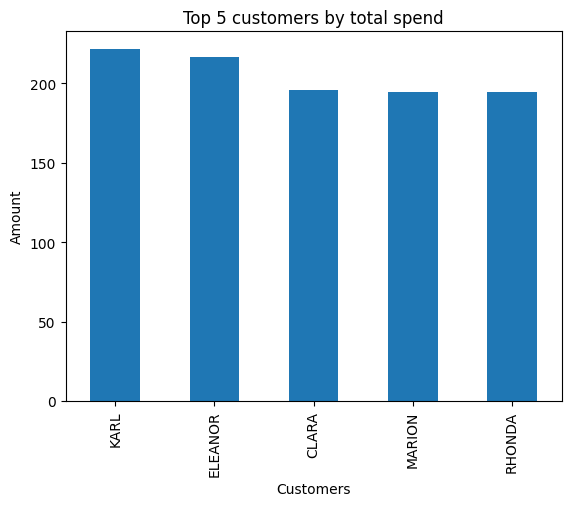

In [ ]:
customers_spend.plot(
    kind="bar",
    x="first_name",
    y="total_spend",
    legend=False
)

plt.title("Top 5 customers by total spend")
plt.xlabel("Customers")
plt.ylabel("Amount")
plt.show()


In [ ]:
category_revenue = conn.sql("""
SELECT
    c.name AS category,
    SUM(p.amount) AS total_revenue
FROM category c
JOIN film_category fc
    ON c.category_id = fc.category_id
JOIN film f
    ON f.film_id = fc.film_id
JOIN inventory i
    ON i.film_id = f.film_id
JOIN rental r
    ON r.inventory_id = i.inventory_id
JOIN payment p
    ON p.rental_id = r.rental_id
GROUP BY c.name
ORDER BY total_revenue DESC;
""").df()

category_revenue


,category,total_revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


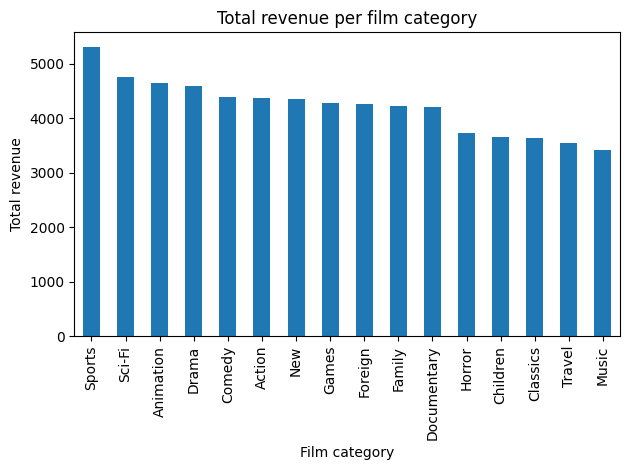

In [ ]:
category_revenue.plot(
    kind="bar",
    x="category",
    y="total_revenue",
    legend=False
)

plt.title("Total revenue per film category")
plt.xlabel("Film category")
plt.ylabel("Total revenue")
plt.tight_layout()
plt.show()
